<a href="https://colab.research.google.com/github/Rohitcvs/ModuleC/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Root Finding Problem Statement
The root-finding problem is a fundamental problem in numerical analysis and applied mathematics. It involves determining the value(s) of which for a given function f(x) evaluates to zero:
f(x) = 0
Root-finding algorithms are widely used in science, engineering, and computational mathematics for solving equations where explicit algebraic solutions are difficult or impossible to obtain. Some applications include:
1. Physics & Engineering: Finding equilibrium points, solving motion equations, or modeling electrical circuits.
2. Machine Learning & AI: Optimizing cost functions to find the minimum error.
3. Economics & Finance: Computing break-even points or solving financial equations.

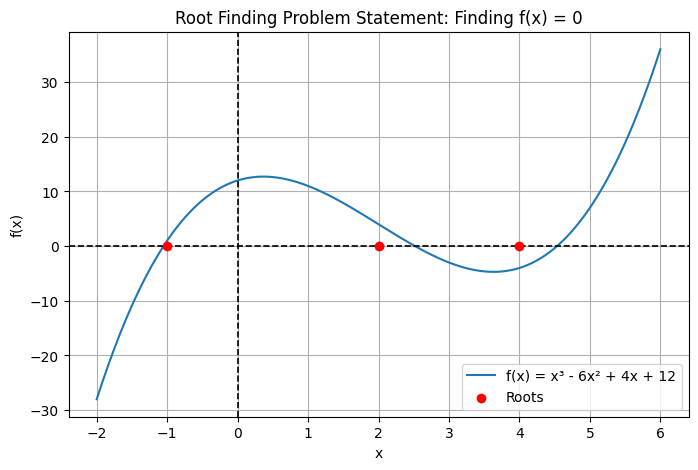

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(x):
    return x**3 - 6*x**2 + 4*x + 12  # Example function

# Generate x values
x = np.linspace(-2, 6, 400)
y = f(x)

# Plot the function
plt.figure(figsize=(8,5))
plt.plot(x, y, label="f(x) = x³ - 6x² + 4x + 12")
plt.axhline(0, color='black', linewidth=1.2, linestyle="--")  # x-axis
plt.axvline(0, color='black', linewidth=1.2, linestyle="--")  # y-axis
plt.grid()

# Highlight approximate root locations
approx_roots = [-1, 2, 4]  # Assume we found these roots using a method
plt.scatter(approx_roots, [0, 0, 0], color='red', zorder=3, label="Roots")

plt.legend()
plt.title("Root Finding Problem Statement: Finding f(x) = 0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Section 2: Tolerance
Tolerance in Root Finding refers to the threshold that determines when an iterative method should stop and accept the current approximation as the root. Since numerical methods approach the solution step by step, we need a way to decide when the result is "good enough." Tolerance helps balance accuracy and efficiency—choosing a smaller tolerance ensures a more precise result but may require more iterations, while a larger tolerance speeds up computation at the cost of accuracy.

There are different types of tolerances: absolute tolerance, which checks how close the function value is to zero, and relative tolerance, which ensures that consecutive approximations do not change significantly. Many algorithms also use a combination of both for better stability. Without a well-chosen tolerance, an algorithm may either stop too early, giving an inaccurate root, or continue unnecessarily, wasting computational resources. In practical applications, tolerance is crucial for controlling precision in scientific computing, engineering simulations, and machine learning optimization.

In [2]:
## Using Tolerance in Newton - Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newton-Raphson method with tolerance stopping condition.

    Parameters:
    f : function - The function whose root we are finding.
    df : function - The derivative of f.
    x0 : float - Initial guess.
    tol : float - Tolerance level for stopping.
    max_iter : int - Maximum iterations.

    Returns:
    float - Approximate root of f(x).
    """
    x = x0
    iter_count = 0

    while abs(f(x)) > tol and iter_count < max_iter:
        x_new = x - f(x) / df(x)  # Newton-Raphson formula

        # Stop if the change in x is smaller than tolerance
        if abs(x_new - x) < tol:
            break

        x = x_new
        iter_count += 1

    return x

# Example function: f(x) = x^2 - 2 (Root at sqrt(2))
f = lambda x: x**2 - 2
df = lambda x: 2*x

root = newton_raphson(f, df, x0=1.5, tol=1e-6)
print("Newton-Raphson Root:", root)

Newton-Raphson Root: 1.4142135623746899


In [3]:
## Using Tolerance in Bisection Method
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Bisection method with tolerance.

    Parameters:
    f : function - Function whose root we are finding.
    a, b : float - Interval [a, b] where root is known.
    tol : float - Tolerance level for stopping.
    max_iter : int - Maximum iterations.

    Returns:
    float - Approximate root of f(x).
    """
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have opposite signs at a and b.")

    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2  # Midpoint
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1

    return (a + b) / 2

# Example function: f(x) = x^3 - 4x - 9
f = lambda x: x**3 - 4*x - 9

root = bisection_method(f, 2, 3, tol=1e-6)
print("Bisection Method Root:", root)

Bisection Method Root: 2.706528663635254


Section 3: Bisection Method
The Bisection Method is a simple and reliable numerical technique for finding the root of a continuous function within a given interval. It works by repeatedly dividing the interval in half and selecting the subinterval where the function changes sign, ensuring that a root exists within that range. The method starts with two initial points where the function values have opposite signs, guaranteeing the presence of at least one root. In each iteration, the midpoint of the interval is computed, and the function is evaluated at this point. If the midpoint value is sufficiently close to zero, it is accepted as the root; otherwise, the interval is updated by replacing one of the endpoints with the midpoint, ensuring that the new interval still contains the root.

This process continues until the interval length becomes smaller than a predefined tolerance, providing an approximation of the root. The Bisection Method is guaranteed to converge if the function is continuous, though it may be slower compared to other root-finding techniques. Its reliability and simplicity make it widely used in numerical analysis, particularly in cases where other methods may fail due to discontinuities or poor initial guesses.

The Bisection Method is a simple and reliable numerical approach to finding the root of a function within a given interval. It works by repeatedly dividing the interval in half and selecting the subinterval where the function changes sign, ensuring that a root exists. The method continues this process until the interval becomes sufficiently small, providing an approximation of the root. While it is guaranteed to converge for continuous functions, it can be slower than other root-finding methods. Its simplicity and robustness make it useful in various mathematical and engineering applications.

In [4]:
def bisection(f, a, b, tol=1e-6, max_iter=100):
    """
    Alternative Bisection Method implementation to find the root of f(x) within [a, b].

    Parameters:
    f : function - The function whose root is to be found.
    a, b : float - The initial interval where f(a) and f(b) have opposite signs.
    tol : float - Tolerance level for stopping condition.
    max_iter : int - Maximum number of iterations.

    Returns:
    float - Approximate root of f(x).
    """
    if f(a) * f(b) >= 0:
        raise ValueError("Function values at the endpoints must have opposite signs.")

    iteration = 0
    while (b - a) > tol and iteration < max_iter:
        mid = (a + b) / 2  # Compute midpoint
        f_mid = f(mid)

        print(f"Iteration {iteration+1}: a={a}, b={b}, mid={mid}, f(mid)={f_mid}")

        if abs(f_mid) < tol:  # Stopping condition if f(mid) is close enough to zero
            return mid
        elif f(a) * f_mid < 0:
            b = mid  # Root is in the left subinterval
        else:
            a = mid  # Root is in the right subinterval

        iteration += 1

    return (a + b) / 2  # Return the best approximation

# Example function: f(x) = x^3 - 4x - 9
f = lambda x: x**3 - 4*x - 9

# Finding the root in the interval [2, 3]
root = bisection(f, 2, 3, tol=1e-6)
print("Approximate Root:", root)

Iteration 1: a=2, b=3, mid=2.5, f(mid)=-3.375
Iteration 2: a=2.5, b=3, mid=2.75, f(mid)=0.796875
Iteration 3: a=2.5, b=2.75, mid=2.625, f(mid)=-1.412109375
Iteration 4: a=2.625, b=2.75, mid=2.6875, f(mid)=-0.339111328125
Iteration 5: a=2.6875, b=2.75, mid=2.71875, f(mid)=0.220916748046875
Iteration 6: a=2.6875, b=2.71875, mid=2.703125, f(mid)=-0.061077117919921875
Iteration 7: a=2.703125, b=2.71875, mid=2.7109375, f(mid)=0.07942342758178711
Iteration 8: a=2.703125, b=2.7109375, mid=2.70703125, f(mid)=0.00904923677444458
Iteration 9: a=2.703125, b=2.70703125, mid=2.705078125, f(mid)=-0.026044897735118866
Iteration 10: a=2.705078125, b=2.70703125, mid=2.7060546875, f(mid)=-0.008505572564899921
Iteration 11: a=2.7060546875, b=2.70703125, mid=2.70654296875, f(mid)=0.00026989623438566923
Iteration 12: a=2.7060546875, b=2.70654296875, mid=2.706298828125, f(mid)=-0.004118322089198045
Iteration 13: a=2.706298828125, b=2.70654296875, mid=2.7064208984375, f(mid)=-0.0019243339138483861
Iteration 

Section 4: Newton - Raphson Method
The Newton-Raphson Method is an efficient iterative technique used to find the roots of a function. It starts with an initial guess and refines the
estimate by using the slope of the function at that point. By following the direction where the function decreases, the method quickly converges to the
root if the initial guess is close enough. This method is significantly faster than bracketing methods like the Bisection Method because it has a rapid
rate of convergence.

However, it requires the derivative of the function and can fail if the derivative is zero or if the initial guess is too far from the actual root.
Despite these limitations, the Newton-Raphson Method is widely used in scientific computing, engineering, and optimization problems due to its speed
and effectiveness.

The Newton-Raphson Method is particularly useful for solving equations where high precision is required, as it converges quickly under favorable
conditions. Unlike bracketing methods, which gradually narrow down the interval containing the root, Newton-Raphson directly moves toward the solution
by estimating how the function behaves locally. However, its success depends heavily on a good initial guess—if the starting point is too far from the
root or if the function has sharp turns, discontinuities, or multiple roots nearby, the method may fail to converge or oscillate indefinitely.

In [5]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newton-Raphson method for root finding.

    Parameters:
    f : function - The function whose root we are finding.
    df : function - The derivative of f(x).
    x0 : float - Initial guess.
    tol : float - Tolerance level for stopping condition.
    max_iter : int - Maximum iterations.

    Returns:
    float - Approximate root of f(x).
    """
    x = x0
    iteration = 0

    while abs(f(x)) > tol and iteration < max_iter:
        if df(x) == 0:
            raise ValueError("Derivative is zero. Newton-Raphson may fail to converge.")

        x_new = x - f(x) / df(x)  # Newton-Raphson formula
        print(f"Iteration {iteration+1}: x={x}, f(x)={f(x)}, df(x)={df(x)}, x_new={x_new}")

        if abs(x_new - x) < tol:  # Stopping condition
            break

        x = x_new
        iteration += 1

    return x

# Example function: f(x) = x^3 - x - 2 (Root near x ≈ 1.5)
f = lambda x: x**3 - x - 2
df = lambda x: 3*x**2 - 1  # Derivative of f(x)

# Finding root with initial guess x0 = 1.5
root = newton_raphson(f, df, x0=1.5, tol=1e-6)
print("Newton-Raphson Approximate Root:", root)

Iteration 1: x=1.5, f(x)=-0.125, df(x)=5.75, x_new=1.5217391304347827
Iteration 2: x=1.5217391304347827, f(x)=0.0021369277554046384, df(x)=5.947069943289225, x_new=1.5213798059647863
Newton-Raphson Approximate Root: 1.5213798059647863
